In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv('nyc-rolling-sales.csv')

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
df.shape

(84548, 22)

In [5]:
#dropping as it is empty 

In [6]:
del df['EASE-MENT']
del df['Unnamed: 0']
del df['SALE DATE']

In [7]:
sum(df.duplicated(df.columns))

1358

In [8]:
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [9]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [10]:
pd.set_option('display.max_columns',30)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83190 entries, 0 to 84547
Data columns (total 19 columns):
BOROUGH                           83190 non-null int64
NEIGHBORHOOD                      83190 non-null object
BUILDING CLASS CATEGORY           83190 non-null object
TAX CLASS AT PRESENT              83190 non-null object
BLOCK                             83190 non-null int64
LOT                               83190 non-null int64
BUILDING CLASS AT PRESENT         83190 non-null object
ADDRESS                           83190 non-null object
APARTMENT NUMBER                  83190 non-null object
ZIP CODE                          83190 non-null int64
RESIDENTIAL UNITS                 83190 non-null int64
COMMERCIAL UNITS                  83190 non-null int64
TOTAL UNITS                       83190 non-null int64
LAND SQUARE FEET                  83190 non-null object
GROSS SQUARE FEET                 83190 non-null object
YEAR BUILT                        83190 non-null int64
TAX

In [12]:
df.replace({"-":np.NaN},inplace=True)

In [13]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000


In [14]:
sum(df.duplicated(df.columns))

0

In [15]:
df.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
dtype: object

In [16]:
#changing to appropriate dtypes

In [17]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

In [18]:
df['LAND SQUARE FEET']=pd.to_numeric(df['LAND SQUARE FEET'],errors='coerce')

In [19]:
df['GROSS SQUARE FEET']=pd.to_numeric(df['GROSS SQUARE FEET'],errors='coerce')

In [20]:
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83190 entries, 0 to 84547
Data columns (total 19 columns):
BOROUGH                           83190 non-null int64
NEIGHBORHOOD                      83190 non-null object
BUILDING CLASS CATEGORY           83190 non-null object
TAX CLASS AT PRESENT              83190 non-null category
BLOCK                             83190 non-null int64
LOT                               83190 non-null int64
BUILDING CLASS AT PRESENT         83190 non-null object
ADDRESS                           83190 non-null object
APARTMENT NUMBER                  83190 non-null object
ZIP CODE                          83190 non-null int64
RESIDENTIAL UNITS                 83190 non-null int64
COMMERCIAL UNITS                  83190 non-null int64
TOTAL UNITS                       83190 non-null int64
LAND SQUARE FEET                  57217 non-null float64
GROSS SQUARE FEET                 55913 non-null float64
YEAR BUILT                        83190 non-null int64

In [22]:
df.shape

(83190, 19)

In [23]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,83190.000000,83190.000000,83190.00000,83190.00000,83190.000000,83190.000000,83190.000000,5.721700e+04,5.591300e+04,83190.000000,6.928100e+04
mean,2.998461,4241.989314,376.47900,10732.19780,1.998509,0.183688,2.211624,3.858418e+03,3.891878e+03,1790.526854,1.286521e+06
std,1.290005,3567.925112,658.41729,1290.28681,16.621786,8.606908,18.838995,4.172199e+04,3.496904e+04,535.529082,1.145690e+07
min,1.000000,1.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1326.000000,22.00000,10305.00000,0.000000,0.000000,1.000000,1.640000e+03,1.040000e+03,1920.000000,2.350000e+05
50%,3.000000,3317.000000,50.00000,11209.00000,1.000000,0.000000,1.000000,2.315000e+03,1.672000e+03,1940.000000,5.350000e+05
75%,4.000000,6290.000000,1001.00000,11357.00000,2.000000,0.000000,2.000000,3.500000e+03,2.548000e+03,1965.000000,9.500000e+05
max,5.000000,16322.000000,9106.00000,11694.00000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


In [24]:
variables = df.columns

count = []

for variable in variables:
    length = df[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(df), 2)

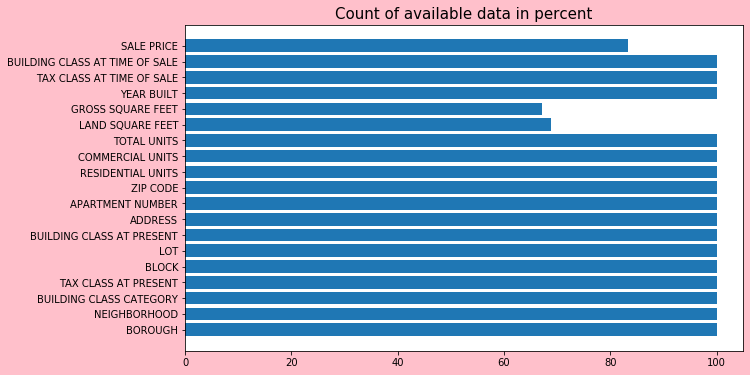

In [25]:
plt.figure(figsize=(10,6),facecolor='pink')
plt.barh(variables, count_pct)
plt.title('Count of available data in percent', fontsize=15)
plt.show()

In [26]:
df=df.dropna()

In [27]:
# df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].median())
# df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].median())
# df['SALE PRICE']=df['SALE PRICE'].fillna(df['SALE PRICE'].median())

In [28]:
variables = df.columns

count = []

for variable in variables:
    length = df[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(df), 2)

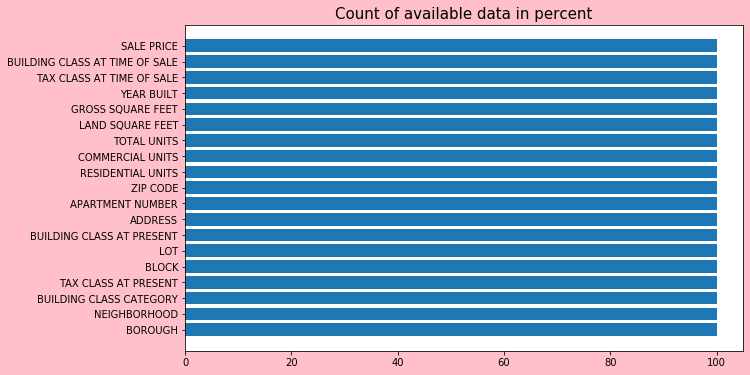

In [29]:
plt.figure(figsize=(10,6),facecolor='pink')
plt.barh(variables, count_pct)
plt.title('Count of available data in percent', fontsize=15)
plt.show()

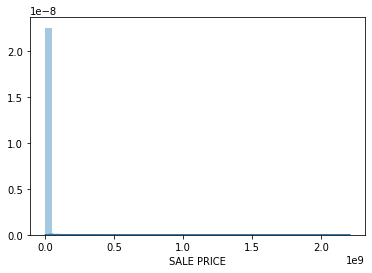

In [30]:
sns.distplot(df['SALE PRICE'])

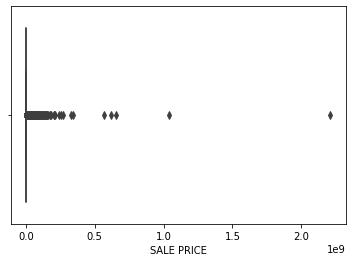

In [31]:
sns.boxplot(df['SALE PRICE'])

In [32]:
#removing observations which falls above these regions

In [33]:
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]

In [34]:
# q1=df['SALE PRICE'].quantile(0.25)
# q3=df['SALE PRICE'].quantile(0.75)
# iqr=q3-q1
# hol=q3+(1.5*iqr)

# df.drop(df[df['SALE PRICE']>hol].index,inplace=True)

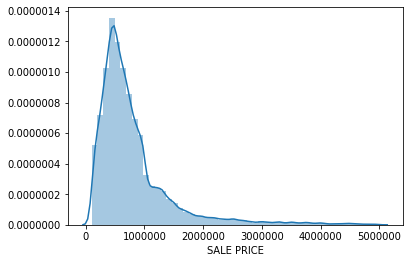

In [35]:
sns.distplot(df['SALE PRICE'])

In [36]:
df['SALE PRICE'].skew()

2.6539554566713504

0.14726562866265505


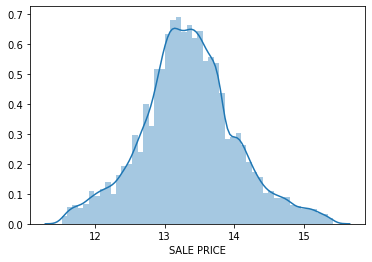

In [37]:
sales=np.log(df['SALE PRICE'])
print(sales.skew())
sns.distplot(sales)

In [38]:
#normal distribution

In [39]:
ms=df.isnull().sum()
ms[ms>0]/len(df)

Series([], dtype: float64)

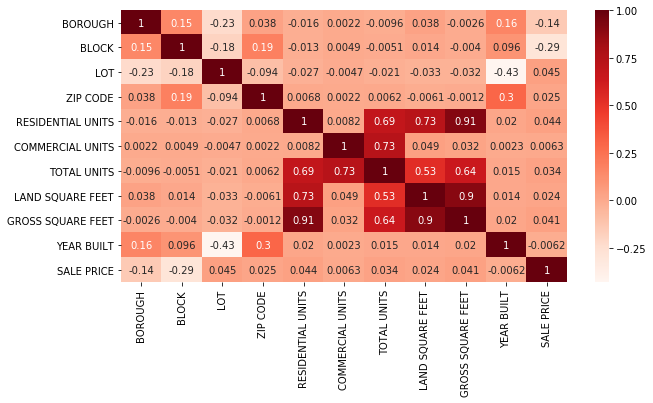

In [40]:
plt.figure(figsize=(10,5))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.Reds)

Block and borough are negativelty correlating with sale price

There is multicollinearity within the independent variables

In [41]:
corr['SALE PRICE'].sort_values(ascending=False)

SALE PRICE           1.000000
LOT                  0.044808
RESIDENTIAL UNITS    0.044031
GROSS SQUARE FEET    0.041163
TOTAL UNITS          0.034385
ZIP CODE             0.025406
LAND SQUARE FEET     0.024230
COMMERCIAL UNITS     0.006251
YEAR BUILT          -0.006246
BOROUGH             -0.142466
BLOCK               -0.285436
Name: SALE PRICE, dtype: float64

In [42]:
df['SALE PRICE'].skew()

2.6539554566713504

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34685 entries, 3 to 84545
Data columns (total 19 columns):
BOROUGH                           34685 non-null int64
NEIGHBORHOOD                      34685 non-null object
BUILDING CLASS CATEGORY           34685 non-null object
TAX CLASS AT PRESENT              34685 non-null category
BLOCK                             34685 non-null int64
LOT                               34685 non-null int64
BUILDING CLASS AT PRESENT         34685 non-null object
ADDRESS                           34685 non-null object
APARTMENT NUMBER                  34685 non-null object
ZIP CODE                          34685 non-null int64
RESIDENTIAL UNITS                 34685 non-null int64
COMMERCIAL UNITS                  34685 non-null int64
TOTAL UNITS                       34685 non-null int64
LAND SQUARE FEET                  34685 non-null float64
GROSS SQUARE FEET                 34685 non-null float64
YEAR BUILT                        34685 non-null int64

In [44]:
num_cols=list(df.select_dtypes(exclude=['object','category','datetime']).columns)
num_cols

['BOROUGH',
 'BLOCK',
 'LOT',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'SALE PRICE']

In [45]:
#sns.pairplot(df[num_cols])

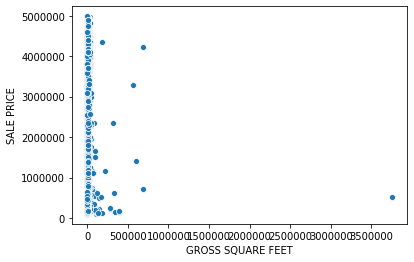

In [46]:
sns.scatterplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df)

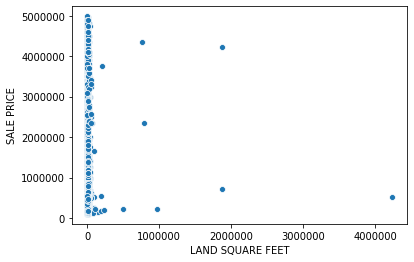

In [47]:
sns.scatterplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df)

In [48]:
# plt.figure(figsize=(10,6))
# sns.boxplot(x='LAND SQUARE FEET', data=df,showfliers=False)

In [49]:
df[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], 
                                            as_index=False).count().sort_values(by='SALE PRICE', ascending=False)

,TOTAL UNITS,SALE PRICE
1,1,16864
2,2,9522
0,0,3761
3,3,2734
4,4,708
6,6,366
5,5,178
8,8,137
7,7,75
9,9,57


In [50]:
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] != 2261)] 

In [51]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0
172,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,624 EAST 9TH STREET,,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0
174,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,S5,183 AVENUE B,,10009,5,1,6,1779.0,3713.0,1910,2,S5,4750000.0
195,1,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,115 AVENUE C,,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0


In [52]:
numeric_data=df.select_dtypes(include=[np.number])
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,30923.000000,30923.000000,30923.000000,30923.000000,30923.000000,30923.000000,30923.000000,3.092300e+04,3.092300e+04,30923.000000,3.092300e+04
mean,3.513663,5337.961873,229.688129,11034.103418,1.931475,0.102416,2.036284,3.116193e+03,2.320216e+03,1881.660900,8.301891e+05
std,0.925338,3730.155061,485.181384,476.313920,12.018120,1.169026,12.188207,2.984991e+04,2.342131e+04,350.977799,6.615981e+05
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,1.007000e+05
25%,3.000000,2341.000000,22.000000,10468.000000,1.000000,0.000000,1.000000,1.800000e+03,1.168000e+03,1920.000000,4.470000e+05
50%,3.000000,4743.000000,46.000000,11221.000000,1.000000,0.000000,1.000000,2.380000e+03,1.648000e+03,1931.000000,6.450000e+05
75%,4.000000,7568.000000,97.000000,11367.000000,2.000000,0.000000,2.000000,3.406000e+03,2.364000e+03,1965.000000,9.520630e+05
max,5.000000,16319.000000,5361.000000,11694.000000,1844.000000,126.000000,1866.000000,4.228300e+06,3.750565e+06,2017.000000,4.975000e+06


In [53]:
cat_cols=list(df.select_dtypes(include=['object','category']).columns)
cat_cols

['NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'APARTMENT NUMBER',
 'TAX CLASS AT TIME OF SALE',
 'BUILDING CLASS AT TIME OF SALE']

In [54]:
df[cat_cols].head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,154 EAST 7TH STREET,,2,C4
6,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,210 AVENUE B,,2,C4
172,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,624 EAST 9TH STREET,,2,S3
174,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S5,183 AVENUE B,,2,S5
195,ALPHABET CITY,22 STORE BUILDINGS,4,K4,115 AVENUE C,,4,K4


In [55]:
df['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                         12350
02 TWO FAMILY DWELLINGS                          9519
13 CONDOS - ELEVATOR APARTMENTS                  2437
03 THREE FAMILY DWELLINGS                        2242
07 RENTALS - WALKUP APARTMENTS                   1352
15 CONDOS - 2-10 UNIT RESIDENTIAL                 737
04 TAX CLASS 1 CONDOS                             508
12 CONDOS - WALKUP APARTMENTS                     365
22 STORE BUILDINGS                                354
14 RENTALS - 4-10 UNIT                            284
29 COMMERCIAL GARAGES                             138
21 OFFICE BUILDINGS                               127
30 WAREHOUSES                                     121
27 FACTORIES                                       69
44 CONDO PARKING                                   61
37 RELIGIOUS FACILITIES                            40
43 CONDO OFFICE BUILDINGS                          29
05 TAX CLASS 1 VACANT LAND                         24
10 COOPS - ELEVATOR APARTMEN

In [56]:
del df['BUILDING CLASS AT PRESENT']
del df['BUILDING CLASS AT TIME OF SALE']
del df['NEIGHBORHOOD']

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30923 entries, 3 to 84545
Data columns (total 16 columns):
BOROUGH                      30923 non-null int64
BUILDING CLASS CATEGORY      30923 non-null object
TAX CLASS AT PRESENT         30923 non-null category
BLOCK                        30923 non-null int64
LOT                          30923 non-null int64
ADDRESS                      30923 non-null object
APARTMENT NUMBER             30923 non-null object
ZIP CODE                     30923 non-null int64
RESIDENTIAL UNITS            30923 non-null int64
COMMERCIAL UNITS             30923 non-null int64
TOTAL UNITS                  30923 non-null int64
LAND SQUARE FEET             30923 non-null float64
GROSS SQUARE FEET            30923 non-null float64
YEAR BUILT                   30923 non-null int64
TAX CLASS AT TIME OF SALE    30923 non-null category
SALE PRICE                   30923 non-null float64
dtypes: category(2), float64(3), int64(8), object(3)
memory usage: 3.6+ MB


In [58]:
df['BOROUGH']=df['BOROUGH'].astype('category')
df['BUILDING CLASS CATEGORY']=df['BUILDING CLASS CATEGORY'].astype('category')

In [59]:
cat_cols=list(df.select_dtypes(include=['category']).columns)
cat_cols

['BOROUGH',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'TAX CLASS AT TIME OF SALE']

In [60]:
#df=pd.get_dummies(df,columns=cat_cols,drop_first=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30923 entries, 3 to 84545
Data columns (total 16 columns):
BOROUGH                      30923 non-null category
BUILDING CLASS CATEGORY      30923 non-null category
TAX CLASS AT PRESENT         30923 non-null category
BLOCK                        30923 non-null int64
LOT                          30923 non-null int64
ADDRESS                      30923 non-null object
APARTMENT NUMBER             30923 non-null object
ZIP CODE                     30923 non-null int64
RESIDENTIAL UNITS            30923 non-null int64
COMMERCIAL UNITS             30923 non-null int64
TOTAL UNITS                  30923 non-null int64
LAND SQUARE FEET             30923 non-null float64
GROSS SQUARE FEET            30923 non-null float64
YEAR BUILT                   30923 non-null int64
TAX CLASS AT TIME OF SALE    30923 non-null category
SALE PRICE                   30923 non-null float64
dtypes: category(4), float64(3), int64(7), object(2)
memory usage: 3.2+

In [62]:
# from sklearn.model_selection import train_test_split
# y=df['SALE PRICE']
# X=df.drop('SALE PRICE',axis=1)

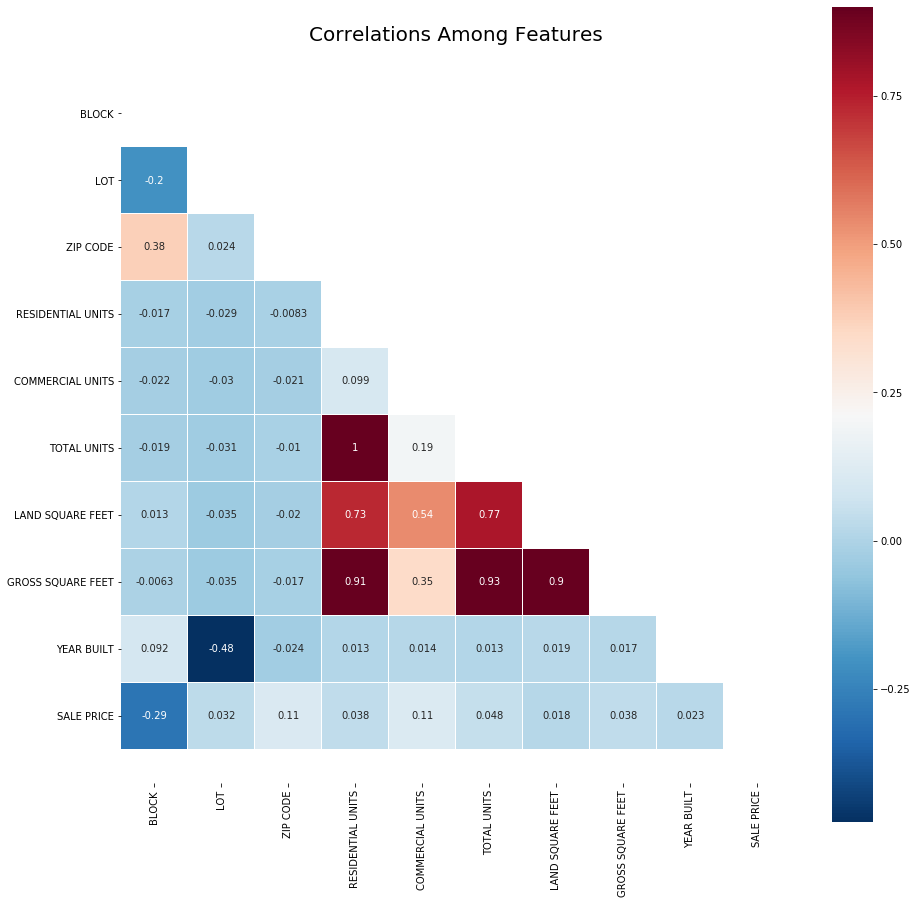

In [63]:
mask = np.zeros_like(df.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig,ax= plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(df.corr(),
           annot=True,
           mask = mask,
           cmap = 'RdBu_r',
           linewidths=0.1,
           linecolor='white',
           vmax = .9,
           square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

In [64]:
## Statistical Significance

In [65]:
from scipy.stats import levene

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30923 entries, 3 to 84545
Data columns (total 16 columns):
BOROUGH                      30923 non-null category
BUILDING CLASS CATEGORY      30923 non-null category
TAX CLASS AT PRESENT         30923 non-null category
BLOCK                        30923 non-null int64
LOT                          30923 non-null int64
ADDRESS                      30923 non-null object
APARTMENT NUMBER             30923 non-null object
ZIP CODE                     30923 non-null int64
RESIDENTIAL UNITS            30923 non-null int64
COMMERCIAL UNITS             30923 non-null int64
TOTAL UNITS                  30923 non-null int64
LAND SQUARE FEET             30923 non-null float64
GROSS SQUARE FEET            30923 non-null float64
YEAR BUILT                   30923 non-null int64
TAX CLASS AT TIME OF SALE    30923 non-null category
SALE PRICE                   30923 non-null float64
dtypes: category(4), float64(3), int64(7), object(2)
memory usage: 3.2+

In [67]:
df.head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
3,1,07 RENTALS - WALKUP APARTMENTS,2B,402,21,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,3936272.0
6,1,07 RENTALS - WALKUP APARTMENTS,2B,406,32,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,3192840.0
172,1,14 RENTALS - 4-10 UNIT,2A,391,19,624 EAST 9TH STREET,,10009,3,1,4,1520.0,3360.0,1910,2,3300000.0
174,1,14 RENTALS - 4-10 UNIT,2A,394,5,183 AVENUE B,,10009,5,1,6,1779.0,3713.0,1910,2,4750000.0
195,1,22 STORE BUILDINGS,4,390,34,115 AVENUE C,,10009,0,1,1,1218.0,3586.0,1899,4,3700000.0


In [68]:
levene(df['SALE PRICE'],df['BLOCK'])         

LeveneResult(statistic=15696.884626005383, pvalue=0.0)

In [69]:
levene(df['SALE PRICE'],df['LOT']) 

LeveneResult(statistic=15915.116158138768, pvalue=0.0)

In [70]:
levene(df['SALE PRICE'],df['ZIP CODE']) 

LeveneResult(statistic=15906.578344361329, pvalue=0.0)

In [71]:
levene(df['SALE PRICE'],df['RESIDENTIAL UNITS']) 

LeveneResult(statistic=15931.513904641293, pvalue=0.0)

In [72]:
levene(df['SALE PRICE'],df['COMMERCIAL UNITS']) 

LeveneResult(statistic=15931.5844352704, pvalue=0.0)

In [73]:
levene(df['SALE PRICE'],df['TOTAL UNITS']) 

LeveneResult(statistic=15931.510151793651, pvalue=0.0)

In [74]:
levene(df['SALE PRICE'],df['LAND SQUARE FEET']) 

LeveneResult(statistic=15746.880442374144, pvalue=0.0)

In [75]:
levene(df['SALE PRICE'],df['GROSS SQUARE FEET']) 

LeveneResult(statistic=15792.82437859433, pvalue=0.0)

In [76]:
levene(df['SALE PRICE'],df['YEAR BUILT']) 

LeveneResult(statistic=15924.317773608083, pvalue=0.0)

In [77]:
numeric_data.columns

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE'],
      dtype='object')

In [78]:
from scipy.stats import skew
skewed = df[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
df[skewed] = np.log1p(df[skewed])

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()
scaler.fit(df[numeric_data.columns])
scaled = scaler.transform(df[numeric_data.columns])

for i, col in enumerate(numeric_data.columns):
       df[col] = scaled[:,i]

In [81]:
df.head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
3,-2.716525,07 RENTALS - WALKUP APARTMENTS,2B,-2.104001,-0.630547,154 EAST 7TH STREET,,-2.152194,3.729223,-0.236913,3.782178,0.321910,0.867854,0.089292,2,2.747324
6,-2.716525,07 RENTALS - WALKUP APARTMENTS,2B,-2.094631,-0.368810,210 AVENUE B,,-2.152194,3.223278,-0.236913,3.255778,0.226858,0.688286,0.109237,2,2.424093
172,-2.716525,14 RENTALS - 4-10 UNIT,2A,-2.130255,-0.692072,624 EAST 9TH STREET,,-2.152194,1.178702,2.884112,1.713896,0.175556,0.601564,0.080745,2,2.475068
174,-2.716525,14 RENTALS - 4-10 UNIT,2A,-2.123023,-1.469264,183 AVENUE B,,-2.152194,2.200990,2.884112,2.596530,0.232842,0.639343,0.080745,2,3.037490
195,-2.716525,22 STORE BUILDINGS,4,-2.132679,-0.330827,115 AVENUE C,,-2.152194,-2.316523,2.884112,-0.689719,0.094921,0.626182,0.049403,4,2.651738


In [82]:
df=pd.get_dummies(df,columns=cat_cols,drop_first=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30923 entries, 3 to 84545
Data columns (total 64 columns):
BLOCK                                                                   30923 non-null float64
LOT                                                                     30923 non-null float64
ADDRESS                                                                 30923 non-null object
APARTMENT NUMBER                                                        30923 non-null object
ZIP CODE                                                                30923 non-null float64
RESIDENTIAL UNITS                                                       30923 non-null float64
COMMERCIAL UNITS                                                        30923 non-null float64
TOTAL UNITS                                                             30923 non-null float64
LAND SQUARE FEET                                                        30923 non-null float64
GROSS SQUARE FEET                     

In [84]:
# from sklearn.model_selection import train_test_split
# y=df['SALE PRICE']
# X=df.drop('SALE PRICE',axis=1)

In [85]:
del df['ADDRESS']
del df['APARTMENT NUMBER']

In [86]:
from sklearn.model_selection import train_test_split
y=df['SALE PRICE']
X=df.drop('SALE PRICE',axis=1)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [88]:
from sklearn.linear_model import LinearRegression 
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred_lin))

0.772792586071146

In [89]:
#r2_score(y_test,y_pred_lin)

In [90]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [91]:
Ridge=Ridge(alpha=0.3,normalize=True)

In [92]:
Ridge.fit(X_train,y_train)
y_pred_train = Ridge.predict(X_train)
print('Ridge Regression')
y_pred_test = Ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

Ridge Regression
RMSE: 0.8184912557555413


In [93]:
from sklearn.model_selection import train_test_split
y=df['SALE PRICE']
X=df.drop('SALE PRICE',axis=1)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [95]:
alpha=0.00099
lasso_regr=Lasso(alpha=alpha,max_iter=50000)
lasso_regr.fit(X_train, y_train)
y_pred_lasso=lasso_regr.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

RMSE: 0.788505359368391


In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
Y_pred_rf = reg.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, Y_pred_rf)))

RMSE: 0.6139819803285769


In [98]:
from sklearn.ensemble import AdaBoostRegressor

In [99]:
y=df['SALE PRICE']
X=df.drop('SALE PRICE',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [100]:
classifier = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5,criterion='mse'),
    n_estimators=150
)
classifier.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=5,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                       

In [101]:
y_pred=classifier.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.7143758923558262


In [102]:
from xgboost import XGBRegressor

In [103]:
y=df['SALE PRICE']
X=df.drop('SALE PRICE',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [104]:
classifier = XGBRegressor()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

C:\Users\RUPIKASREE K\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:38:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [105]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.6494103639899915


In [106]:
from sklearn.feature_selection import RFE

In [107]:
y=df['SALE PRICE']
X=df.drop('SALE PRICE',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [108]:
X_train.shape

(21646, 61)

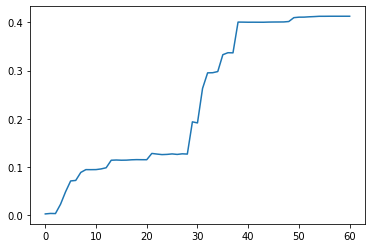

In [109]:
nnof_list=61
score_list=[]

for n in range(nnof_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    model=LinearRegression()
    rfe=RFE(model,n+1)
    X_train_rfe=rfe.fit_transform(X_train,y_train)
    X_test_rfe=rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score=model.score(X_test_rfe,y_test)
    score_list.append(score)
    
plt.plot(score_list)

In [110]:
score_list

[0.002403312422361248,
 0.003369179575669068,
 0.0031382489856032203,
 0.022351048597400225,
 0.04843230213587402,
 0.07090429514472307,
 0.07193978456247285,
 0.0886087232560836,
 0.09439737160049821,
 0.09432065008355672,
 0.09444601795282825,
 0.09584801139527932,
 0.0982895992876236,
 0.11390529692103855,
 0.11435736128216378,
 0.11393772576803096,
 0.11409489126152073,
 0.1148091987161669,
 0.11514352460074428,
 0.11500172169079903,
 0.11497713876717595,
 0.1280260056400908,
 0.12673605442672897,
 0.12559656507559847,
 0.12602580268947305,
 0.12702348389537388,
 0.12598677816213733,
 0.1272045782721074,
 0.12668042936617996,
 0.1936186665881906,
 0.19140335299132993,
 0.2629743576791319,
 0.29538664727016106,
 0.2956694965995038,
 0.29807707696145724,
 0.33308023015525856,
 0.33717593015124125,
 0.33694303016113125,
 0.4008292827033896,
 0.4007174333169822,
 0.40053313541746305,
 0.4005747681477603,
 0.4005291162158623,
 0.40049104948317027,
 0.4008177851204522,
 0.400958430893074

In [111]:
cols=list(X_train.columns)
model=LinearRegression()
rfe=RFE(model,39)
X_train_rfe=rfe.fit_transform(X_train,y_train)
model.fit(X_train_rfe,X_train)
temp=pd.Series(rfe.support_,index=cols)
selected_features=list(temp[temp==True].index)
print(selected_features)

['BLOCK', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BOROUGH_-1.6358210567176763', 'BOROUGH_-0.5551174325400811', 'BOROUGH_0.5255861916375143', 'BOROUGH_1.6062898158151098', 'BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS                      ', 'BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND                 ', 'BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER                     ', 'BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS             ', 'BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS           ', 'BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS               ', 'BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS             ', 'BUILDING CLASS CATEGORY_11A CONDO-RENTALS                           ', 'BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS              ', 'BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS            ', 'BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT                     ', 'BUILDING CLASS CATEGORY_15 CONDOS - 2-10 UNI

In [112]:
lr=LinearRegression(fit_intercept=True)
lr.fit(X_train[selected_features],y_train)
y_pred=lr.predict(X_test[selected_features])

In [113]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.7771543887654407


In [114]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [115]:
Ridge=Ridge(alpha=0.3,normalize=True)


In [116]:
Ridge.fit(X_train[selected_features],y_train)
y_pred_test = Ridge.predict(X_test[selected_features])
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

RMSE: 0.8245974609290493


In [117]:
alpha=0.00099
lasso_regr=Lasso(alpha=alpha,max_iter=50000)
lasso_regr.fit(X_train[selected_features], y_train)
y_pred=lasso_regr.predict(X_test[selected_features])
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.7882784756122212


In [118]:
reg = RandomForestRegressor()
reg.fit(X_train[selected_features], y_train)
y_pred_rf = reg.predict(X_test[selected_features])
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))

RMSE: 0.6132984745340994


In [119]:
classifier = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5,criterion='mse'),
    n_estimators=150
)
classifier.fit(X_train[selected_features], y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=5,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                       

In [120]:
y_pred_rf = reg.predict(X_test[selected_features])

In [121]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.7882784756122212


In [122]:
classifier = XGBRegressor()
classifier.fit(X_train[selected_features], y_train)
y_pred = classifier.predict(X_test[selected_features])
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

[17:40:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\RUPIKASREE K\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE: 0.6539105291634854


In [123]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
enet = ElasticNet(alpha=0.1)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [124]:
y_pred=enet.predict(X_test)

In [125]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.8713426225330723


In [126]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
enet = ElasticNet(alpha=0.1)
enet.fit(X_train[selected_features], y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [127]:
y_pred=enet.predict(X_test[selected_features])

In [128]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.8993445075850461


In [129]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)

In [130]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [131]:
y_pred_test=knn.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score of Test: 0.5684827442286755
RMSE: 0.8993445075850461


In [132]:
knn.fit(X_train[selected_features],y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [133]:
y_pred_test=knn.predict(X_test[selected_features])
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score of Test: 0.6016638494855241
RMSE: 0.8993445075850461


In [134]:
from sklearn.ensemble import BaggingRegressor
baggr_lr=BaggingRegressor(base_estimator=LinearRegression())

In [136]:
baggr_lr.fit(X_train,y_train)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                 random_state=None, verbose=0, warm_start=False)

In [137]:
y_pred_test=baggr_lr.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mean_squared_error(y_test,y_pred_test)))

R2 score of Test: 0.4132813364572997
RMSE of Test: 0.7690365223918992


In [138]:
baggr_lr.fit(X_train[selected_features],y_train)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                 random_state=None, verbose=0, warm_start=False)

In [139]:
y_pred_test=baggr_lr.predict(X_test[selected_features])
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score of Test: 0.40126257011451527
RMSE: 0.8993445075850461


In [140]:
#rfe didn't yeild any change!

RandomForest Regressor shows least RMSE among all other models